In [1]:
import pandas as pd
from sklearn.manifold import TSNE as Tsne
import numpy as np
from matplotlib import pyplot as plt
from random import sample
from sklearn.cluster import MiniBatchKMeans
import umap
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

In [2]:
#Read in data
df = pd.read_csv("LiverCells.csv", index_col=0)

In [5]:
Xproj = []

#We previously used a for loop to test multiple perplexities and found 30 to be optimal.
perp = 30#for perp in [2,5,10,30,50]: For simplicity of this pdf we are only running a perplexity of 30

#Run t-SNE to find groupings
LiverTSNE = Tsne(perplexity=perp).fit_transform(df.T)


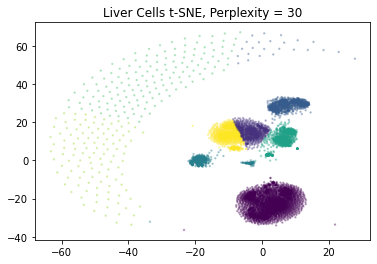

In [4]:
kmeans = MiniBatchKMeans(n_clusters=8, max_iter = 10000)
labels = kmeans.fit_predict(LiverTSNE)
# Plot the results
plt.scatter(LiverTSNE[:,0], LiverTSNE[:,1], alpha=.3, c=labels, s=2)
plt.title("Liver Cells t-SNE, Perplexity = " + str(perp) )
plt.show()

In [4]:
#Use UMAP to find a 2d projection
reducer = umap.UMAP()
embedding = reducer.fit_transform(df.T)

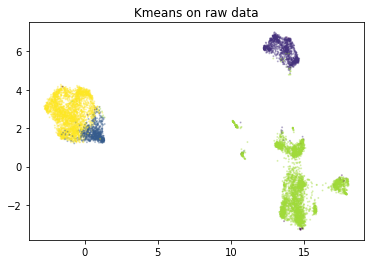

In [11]:
#Attempt to use KMeans to classify the clusters on the uncompressed data
#The UMAP reveals approximately 8 clusters which we are trying to identify
kmeans = MiniBatchKMeans(n_clusters=8, max_iter = 10000)
labels = kmeans.fit_predict(df.T)
plt.scatter(embedding[:,0], embedding[:,1], alpha=.3, s=1, c=labels)
plt.title("Kmeans on raw data")
plt.show()

In [12]:
#A common use of UMAP is the compression of data to improve quality of label identification
kmeans = MiniBatchKMeans(n_clusters=8, max_iter = 10000, n_init=10)
reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=100)
ClusterEmbedding = reducer.fit_transform(df.T)
UMAPlabels = kmeans.fit_predict(ClusterEmbedding)

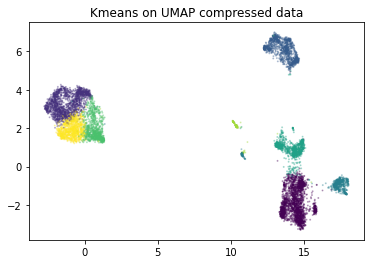

In [28]:
#Plot the data according to the labels found on UMAP compressed data

plt.scatter(embedding[:,0], embedding[:,1], alpha=.3, s=1, c=UMAPlabels, label = UMAPlabels)
plt.title("Kmeans on UMAP compressed data")
viridis = plt.cm.get_cmap('viridis', 8)
#This commented out code produces a legend for the figure. It does however throw several warnings.
legend_aliases = []
for i in range(8):
    legend_aliases.append(plt.scatter([],[],marker='.', label="Type" + str(i),edgecolors=viridis(i),c=viridis(i)))
plt.legend(handles = legend_aliases, loc='lower left', fontsize=7)
plt.show()

In [27]:
#As the UMAP compressed data produced labels that best match our discovered groupings
#We will move forward using them
np.savetxt("UMAPlabels.csv", UMAPlabels, delimiter = ', ', fmt = '% s')

In [29]:
import hdbscan

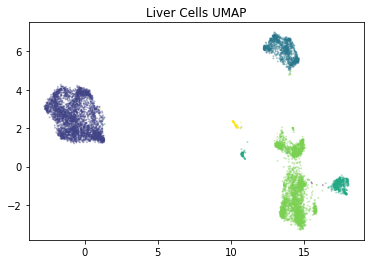

In [30]:
#We also attemped to group our cells using Hbdscan. 
#unfortunately this algorithm did not identify all groupings we desired. 
labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=90, alpha=1.0).fit_predict(ClusterEmbedding)
plt.scatter(embedding[:,0], embedding[:,1], alpha=.3, s=1, c=labels)
plt.title("Liver Cells UMAP")
plt.show()

In [ ]:
Optics = OPTICS(min_samples=5)
Olabels = Optics.fit_predict(df.T)
plt.scatter(embedding[:,0], embedding[:,1], alpha=.3, s=1, c=Olabels)
plt.title("Liver Cells UMAP")
plt.show()

In [ ]:
SC = SpectralClustering(n_clusters=5)
SClabels = SC.fit_predict(df.T)
plt.scatter(embedding[:,0], embedding[:,1], alpha=.3, s=1, c=SClabels)
plt.title("Liver Cells UMAP")
plt.show()